# 深さ優先探索（迷路探索）

## インストールが必要なライブラリ
Anacondaの場合は一度だけ必要となる場合がある

In [1]:
!pip install numpy

## ライブラリのインポート



In [2]:
import numpy as np
from itertools import chain

## 深さ優先探索

In [3]:
#connect = [[1, 5], [0, 2, 6], [1, 3, 7], [2, 4, 8], [3, 9],
#        [6, 0, 10], [5, 7, 1, 11], [6, 8, 2, 12], [7, 9, 3, 13], [8, 4, 14],
#        [11, 5, 15], [10, 12, 6, 16], [11, 13, 7, 17], [12, 14, 8, 18], [13, 9, 19],
#        [16, 10, 20], [15, 17, 11, 21], [16, 18, 12, 22], [17, 19, 13, 23], [18, 14, 24],
#        [21, 15], [20, 22, 16], [21, 23, 17], [22, 24, 18], [23, 19]]
connect = [[5, 1], [6, 2, 0 ], [7, 3, 1], [8, 4, 2], [9, 3],
        [10, 0, 6], [11, 1, 7, 5], [12, 2, 8, 6], [13, 3, 9, 7], [14, 4, 8],
        [15, 5, 11], [16, 6, 12, 10], [17, 7, 13, 11], [18, 8, 14, 12], [19, 9, 13],
        [20, 10, 16], [21, 11, 17, 15], [22, 12, 18, 16], [23, 13, 19, 17], [24, 14, 18],
        [15, 21], [16, 22, 20], [17, 23, 21], [18, 24, 22], [19, 23]]

prev = [-1]*(max(chain(*connect))+1)

open_list = [0]
close_list = []

obst = [0]*(max(chain(*connect))+1)
obst[2] = 1
obst[17] = 1
obst[22] = 1

while open_list:
    now = open_list.pop(-1)#幅優先探索と取り出し方が異なる
    close_list.append(now)
    for i in connect[now]:
        if not(i in close_list) and obst[i]==0:# and not(i in open_list):
            open_list.append(i)
            prev[i] = now

print(close_list)
print(prev)

[0, 1, 6, 5, 10, 11, 12, 13, 14, 9, 8, 7, 3, 4, 4, 19, 18, 23, 24, 24, 8, 18, 7, 16, 15, 20, 21, 21, 15, 7, 11, 5]
[-1, 0, -1, 8, 3, 6, 1, 8, 9, 14, 5, 10, 11, 12, 13, 16, 11, -1, 19, 14, 15, 20, -1, 18, 23]


## 経路の表示

In [4]:
p = 23
route = []
route.append(p)
while p:
    p = prev[p]
    route.append(p)
    print(p)
print(route)

18
19
14
13
12
11
10
5
6
1
0
[23, 18, 19, 14, 13, 12, 11, 10, 5, 6, 1, 0]


## 以下、可視化するための処理

## 可視化するためにインストールが必要なライブラリ

In [5]:
!pip install networkx#可視化するときに必要
!pip install matplotlib#可視化するときに必要
!pip install pydot graphviz#可視化するときに必要
#!conda install python-graphviz#anacondaで実行するときに必要、cmd promptで実行する必要がある

ERROR: Invalid requirement: 'networkx#可視化するときに必要'
ERROR: Invalid requirement: 'matplotlib#可視化するときに必要'
ERROR: Invalid requirement: 'graphviz#可視化するときに必要'


## 可視化するためのライブラリのインポート

In [6]:
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout#表示用
import matplotlib.pyplot as plt#表示用
import matplotlib.animation as animation#アニメーション用
from IPython.display import HTML#アニメーション用

## graphvizで表示するためのデータ形式の変換

In [7]:
tree_graph = []
for i, tr in enumerate(connect):
    for j in tr:
        tree_graph.append((i,j))
print(tree_graph)

[(0, 5), (0, 1), (1, 6), (1, 2), (1, 0), (2, 7), (2, 3), (2, 1), (3, 8), (3, 4), (3, 2), (4, 9), (4, 3), (5, 10), (5, 0), (5, 6), (6, 11), (6, 1), (6, 7), (6, 5), (7, 12), (7, 2), (7, 8), (7, 6), (8, 13), (8, 3), (8, 9), (8, 7), (9, 14), (9, 4), (9, 8), (10, 15), (10, 5), (10, 11), (11, 16), (11, 6), (11, 12), (11, 10), (12, 17), (12, 7), (12, 13), (12, 11), (13, 18), (13, 8), (13, 14), (13, 12), (14, 19), (14, 9), (14, 13), (15, 20), (15, 10), (15, 16), (16, 21), (16, 11), (16, 17), (16, 15), (17, 22), (17, 12), (17, 18), (17, 16), (18, 23), (18, 13), (18, 19), (18, 17), (19, 24), (19, 14), (19, 18), (20, 15), (20, 21), (21, 16), (21, 22), (21, 20), (22, 17), (22, 23), (22, 21), (23, 18), (23, 24), (23, 22), (24, 19), (24, 23)]


## graphvizで表示

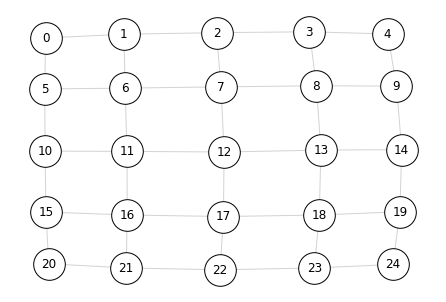

In [8]:
G = nx.Graph()  # 無向グラフ
G.add_nodes_from(range(max(chain(*connect))+1))
G.add_edges_from(tree_graph)
pos = nx.spring_layout(G, seed=22)#7,14
nx.draw(G, pos, node_color='w', edgecolors='k', edge_color='lightgrey', node_size=1000, with_labels=True)

## アニメーション表示用
ノードの色の決定

In [9]:
def MakeField(maxnode, close_list, route):
    pc = ['w']*maxnode

    for i in close_list:#探索済み（クローズドリスト）の色
        pc[i]='lightgray'#白黒表示
#        pc[i]='lightsalmon'#カラー表示
    if len(close_list)>0:#探索対象となるノードの色
        pc[close_list[-1]]='gray'#白黒表示
#        pc[close_list[-1]]='lightgreen'#カラー表示
    for i in route:#ルートの表示用
        pc[i]='dimgray'#白黒表示
#        pc[i]='cyan'#カラー表示
    return pc

## アニメーションの表示

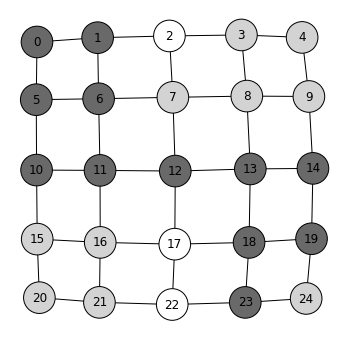

In [10]:
n = 0

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
def update(k):
    global n
    plt.cla()
    plt.axis('off')
    if n<len(close_list):
        pc = MakeField(len(list(G)), close_list[:n], [])
    else:
        pc = MakeField(len(list(G)), close_list, route[:n-len(close_list)])

    nx.draw_networkx(G, pos, node_color=pc, edgecolors='k', edge_color='k', node_size=1000, with_labels=True)
    n = n + 1
    
ani = animation.FuncAnimation(fig, update, interval = 100, frames = len(close_list)+len(route), repeat=False)
HTML(ani.to_jshtml())#jupyter notebookに表示
#ani.save("anim.gif")#gifアニメーションファイルの保存